In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

RANDOM_SEED = 0

In [5]:
sports_science = pd.read_csv("sports_science_dataset.csv")

print(f"List of subjects to select: {list(sports_science.subject.unique())}")

List of subjects to select: ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']


In [6]:
subject = input("Select subject to analyze:")
# selected: p1
activity_type = input("Select types of activities to analyze (casual or excercise):")
# selected: casual

In [7]:
if activity_type == "casual":
        activities = ["Sitting", "Standing", 
                        "Lying on Back", "Lying on Right Side",
                        "Ascending Stairs", "Descending Stairs", 
                        "Standing in an Elevator", "Moving in an Elevator", 
                        "Walking in a Parking Lot"]
elif activity_type == "excercise":
        activities = ["Walking on a Treadmill", "Walking on a Treadmill with an Incline", "Running on a Treadmill", 
                        "Exercising on a Stepper", "Exercising on a Cross Trainer", 
                        "Cycling on an Exercise Bike in a Horizontal Position",
                        "Cycling on an Exercise Bike in a Vertical Position", 
                        "Rowing",
                        "Jumping", 
                        "Playing Basketball"]
else:
        print("Select an appropriate activity type!")

In [8]:
sports_science_filtered = sports_science[(sports_science["subject"]==subject) & (sports_science["activity_name"].isin(activities))]

In [9]:
sports_science_filtered_dimred = sports_science_filtered.drop(columns=["segment", "subject", "activity"]).set_index("activity_name")

scaler = StandardScaler()

sports_science_dimred_scaled = scaler.fit_transform(sports_science_filtered_dimred)

pca = PCA(n_components = 3, random_state=RANDOM_SEED)
sports_science_pca = pca.fit(sports_science_dimred_scaled)

In [10]:
n = sports_science_dimred_scaled.shape[0]
sports_science_pca.singular_values_**2/(n-1)

array([13.40235177,  5.75881144,  3.19159536])

In [11]:
print(sports_science_pca.explained_variance_ratio_, sports_science_pca.explained_variance_ratio_.sum())

[0.29782563 0.12797169 0.07092329] 0.4967206094796019


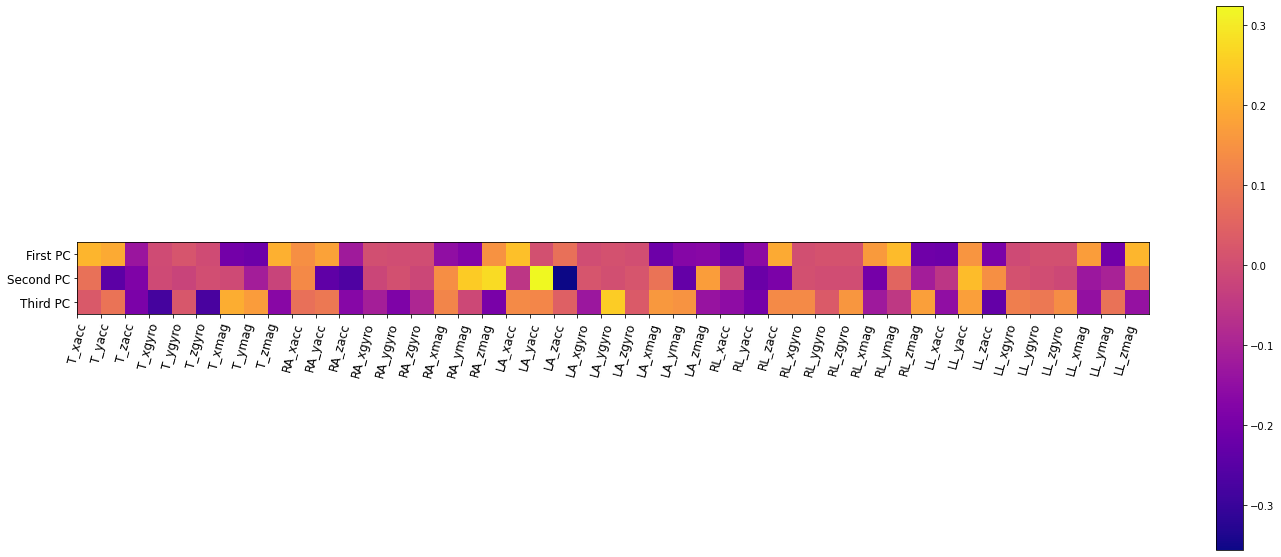

In [12]:
def plot_pca_heatmap(pca, feature_names):
    pc_names = ["First PC", "Second PC", "Third PC"]
    feature_names = list(feature_names)

    fig, ax = plt.subplots(figsize=(24, 10))

    plt.imshow(pca.components_, interpolation = "none", cmap = "plasma")
    plt.xticks(np.arange(-0.5, 44, 1), feature_names, rotation = 75, fontsize = 12)
    plt.yticks(np.arange(0.0, 3, 1), pc_names, fontsize = 12)
    plt.colorbar()

plot_pca_heatmap(sports_science_pca, sports_science_filtered_dimred.columns)

In [13]:
X = sports_science_filtered.drop(columns=["segment", "subject", "activity", "activity_name"])
y = sports_science_filtered.drop(columns=["segment", "subject", "activity"])["activity_name"]

In [14]:
y.unique()

array(['Sitting', 'Standing', 'Lying on Back', 'Lying on Right Side',
       'Ascending Stairs', 'Descending Stairs', 'Standing in an Elevator',
       'Moving in an Elevator', 'Walking in a Parking Lot'], dtype=object)

In [20]:
def display_tsne(tsne_df, perplexity, n_iter):

    plt.rcParams.update({"font.size": 12})
    sns.lmplot(data=tsne_df, x="x", y="y", hue="activity", fit_reg=False, height=8, palette="Set1")
    plt.title(f"Clustering of {activity_type} activities with perplexity : {perplexity} and max_iter : {n_iter}")
    img_name = "tsne_perp_{}_iter_{}.png".format(perplexity, n_iter)
    print("Saving this plot as image in present working directory...")
    plt.savefig(img_name)
    plt.show()

def perform_tsne(X_pre_tsne, y_pre_tsne, perplexities, n_iter=1000):

    for perplexity in perplexities:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate="auto", n_iter=n_iter, init="pca", verbose=1, random_state=RANDOM_SEED)
        X_tsne = tsne.fit_transform(X_pre_tsne)

        df = pd.DataFrame({"x": X_tsne[:,0], "y": X_tsne[:,1], "activity": y_pre_tsne})
        display_tsne(df, perplexity, n_iter)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.005s...
[t-SNE] Computed neighbors for 67500 samples in 79.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for sa

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.869583
[t-SNE] KL divergence after 1000 iterations: 2.640218
Saving this plot as image in present working directory...


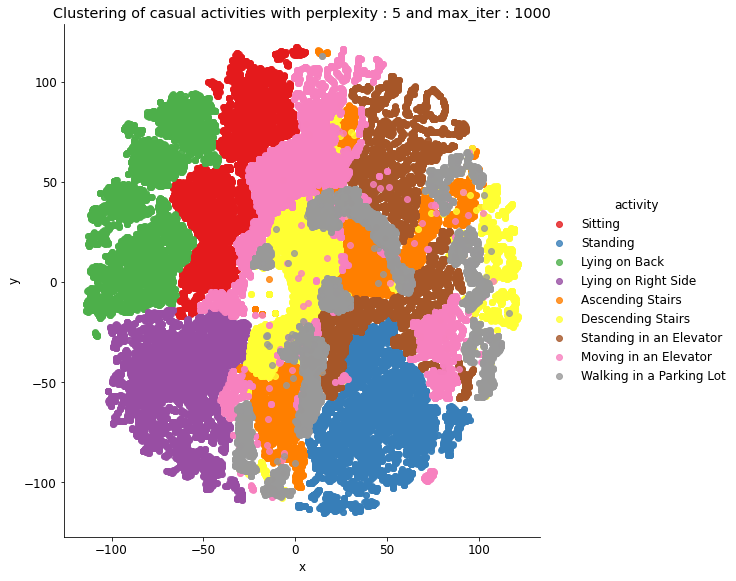

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.004s...
[t-SNE] Computed neighbors for 67500 samples in 73.434s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for sa

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.913437
[t-SNE] KL divergence after 1000 iterations: 2.113653
Saving this plot as image in present working directory...


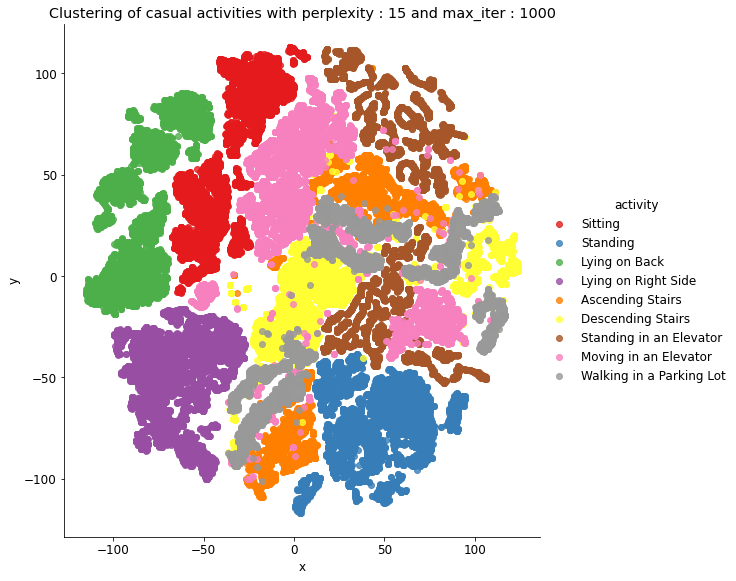

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.004s...
[t-SNE] Computed neighbors for 67500 samples in 72.008s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for sa

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.928474
[t-SNE] KL divergence after 1000 iterations: 1.800485
Saving this plot as image in present working directory...


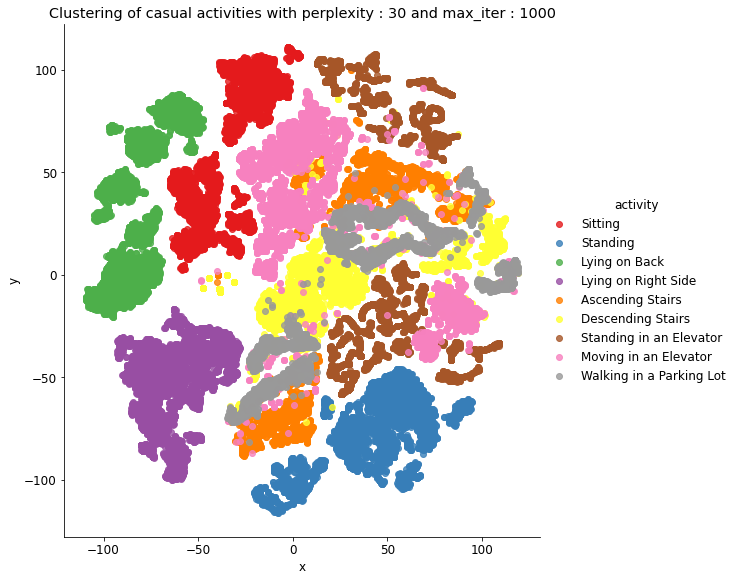

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.003s...
[t-SNE] Computed neighbors for 67500 samples in 73.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for s

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.896164
[t-SNE] KL divergence after 1000 iterations: 1.681549
Saving this plot as image in present working directory...


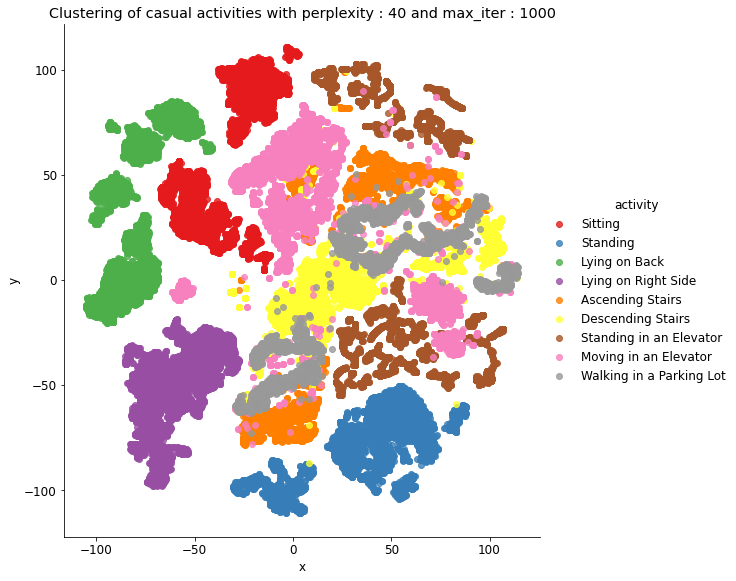

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.004s...
[t-SNE] Computed neighbors for 67500 samples in 73.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for s

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.074799
[t-SNE] KL divergence after 1000 iterations: 1.635759
Saving this plot as image in present working directory...


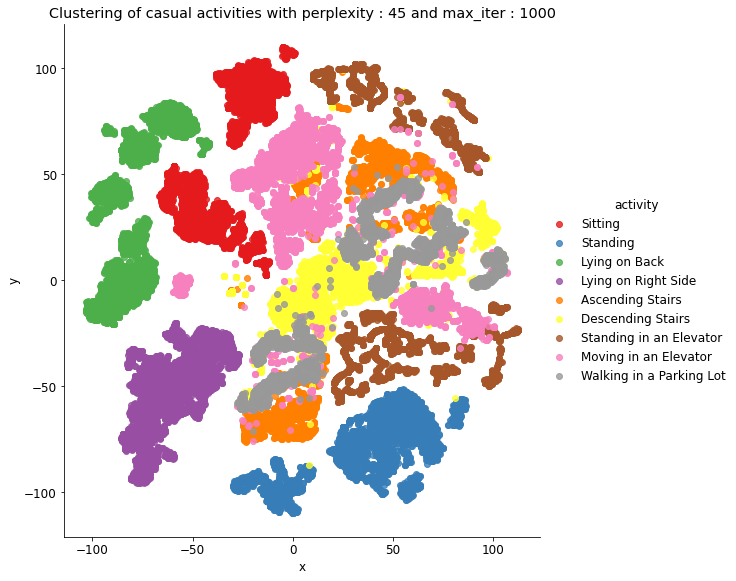

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.004s...
[t-SNE] Computed neighbors for 67500 samples in 73.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for s

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.369949
[t-SNE] KL divergence after 1000 iterations: 1.592616
Saving this plot as image in present working directory...


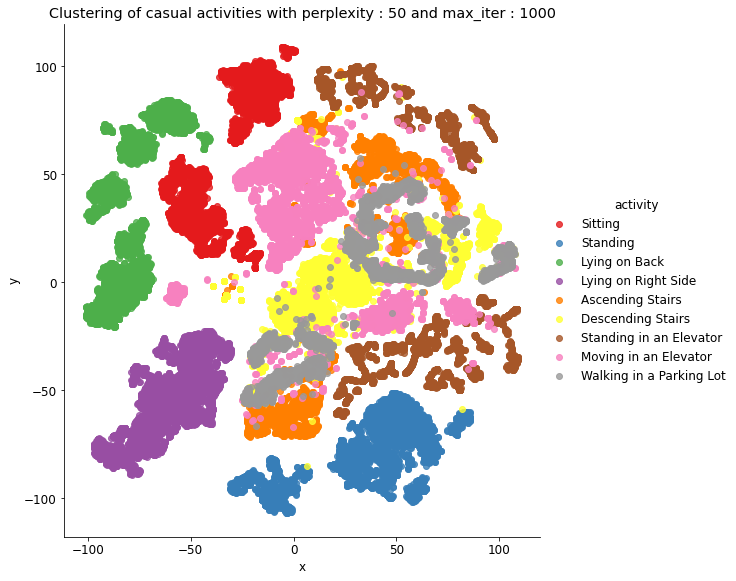

In [21]:
perform_tsne(X, y, perplexities=[5,15,30,40,45,50])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 67500 samples in 0.005s...
[t-SNE] Computed neighbors for 67500 samples in 77.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67500
[t-SNE] Computed conditional probabilities for sample 2000 / 67500
[t-SNE] Computed conditional probabilities for sample 3000 / 67500
[t-SNE] Computed conditional probabilities for sample 4000 / 67500
[t-SNE] Computed conditional probabilities for sample 5000 / 67500
[t-SNE] Computed conditional probabilities for sample 6000 / 67500
[t-SNE] Computed conditional probabilities for sample 7000 / 67500
[t-SNE] Computed conditional probabilities for sample 8000 / 67500
[t-SNE] Computed conditional probabilities for sample 9000 / 67500
[t-SNE] Computed conditional probabilities for sample 10000 / 67500
[t-SNE] Computed conditional probabilities for sample 11000 / 67500
[t-SNE] Computed conditional probabilities for sample 12000 / 67500
[t-SNE] Computed conditional probabilities for s

c:\Users\anima\anaconda3\envs\nextiles_tech\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.369949
[t-SNE] KL divergence after 2000 iterations: 1.466138
Saving this plot as image in present working directory...


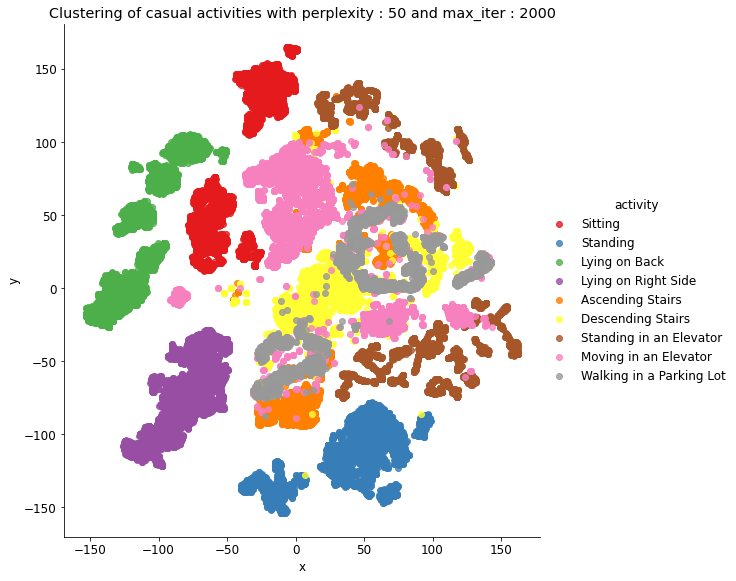

In [22]:
perform_tsne(X, y, perplexities=[50], n_iter=2000)